In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [2]:
target_w = np.linspace(400, 700, 301)
target_R = pd.read_csv('./measurement/R_5_blacktap.csv')['SCAN'].values/100

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[5], th[6], th[7], None]
).reflectance(target_w, 5)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[6], th[7], None]
).reflectance(target_w, 5)

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0]-th[4], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
).reflectance(target_w, 5)

FOM = lambda th: np.mean((hypo_dia(th)-target_R)**2)

In [11]:

sol = differential_evolution(
    FOM, [(1700,2500),(0,12),(0,60),(0,26),(0,60),(0,12)]
)
print(sol.x)

[1704.79076908   11.97830564   28.33533514   22.59082309   39.50178986
   11.72626485]


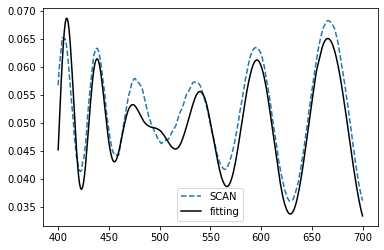

In [19]:
plt.plot(target_w, target_R,'--', label = 'SCAN')
plt.plot(target_w, hypo_R(sol.x), '-k', label = 'fitting')
plt.legend(loc = 'best')
#plt.savefig('dia.png')
plt.show()

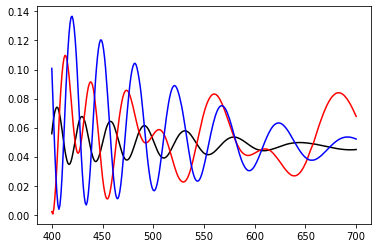

In [49]:
#fit = [1707, 14.1, 34.5, 29.8, 1200, 29.8, 42.6, 9.7
fit = [1900, 10, 40, 26, 1000, 26, 60, 10]
plt.plot(target_w, hypo_dia(fit), '-k')
plt.plot(target_w, hypo_bri(fit), '-r')
plt.plot(target_w, hypo_tra(fit), '-b')
plt.show()

In [7]:
# SemiLab
SL_dia = pd.read_csv('./SE_spectrum/SL_dia.csv', index_col = 0)['R'].values
SL_bri = pd.read_csv('./SE_spectrum/SL_bri.csv', index_col = 0)['R'].values
SL_tra = pd.read_csv('./SE_spectrum/SL_tra.csv', index_col = 0)['R'].values
wl = np.linspace(400, 700, 301)
delta_d_b = np.mean(abs(SL_dia-SL_bri))
delta_d_t = np.mean(abs(SL_dia-SL_tra))
print(delta_d_b, delta_d_t)

0.01726086312211588 0.0029664826885286884
